In [1]:
import sys
sys.path.append('../')
from Lab1.plot_trajectory_2d import plot_trajectory, plot_levels
import optimization
import numpy as np
from Lab2.oracles import QuadraticOracle, create_log_reg_oracle
from Lab1.optimization import newton, gradient_descent
import scipy

from sklearn.datasets import load_svmlight_file

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly
from IPython.display import display, HTML

plotly.offline.init_notebook_mode()
display(HTML(
    '<script type="text/javascript" async src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.1/MathJax.js?config=TeX-MML-AM_SVG"></script>'
))

%reload_ext autoreload
%autoreload 2

# w8a

In [2]:
data_w8a = load_svmlight_file('../Lab1/w8a.txt')

In [3]:
data_w8a[0].shape

(49749, 300)

In [4]:
m_w8a = data_w8a[0].shape[1]

In [5]:
oracle_w8a = create_log_reg_oracle(data_w8a[0], data_w8a[1], regcoef=1/m_w8a)
x_0 = np.zeros(m_w8a)

### GD

In [6]:
x_w8a_grad, mes_w8a_grad, hist_w8a_grad = gradient_descent(oracle_w8a, x_0, trace=True, tolerance=1e-5)

In [7]:
mes_w8a_grad

'success'

In [8]:
log_grad_w8a_grad = np.log10(np.array(hist_w8a_grad['grad']) ** 2 / hist_w8a_grad['grad'][0] ** 2)

### HFN

In [9]:
x_w8a_hfn, mes_w8a_hfn, hist_w8a_hfn = optimization.hessian_free_newton(oracle_w8a, x_0, trace=True, tolerance=1e-9)

In [10]:
mes_w8a_hfn

'success'

In [11]:
log_grad_w8a_hfn = np.log10(np.array(hist_w8a_hfn['grad_norm']) ** 2 / hist_w8a_hfn['grad_norm'][0] ** 2)

### L-BFGS

In [12]:
x_w8a_lbfgs, mes_w8a_lbfgs, hist_w8a_lbfgs = optimization.lbfgs(oracle_w8a, x_0, trace=True, tolerance=1e-9)

In [13]:
mes_w8a_lbfgs

'success'

In [14]:
log_grad_w8a_lbfgs = np.log10(np.array(hist_w8a_lbfgs['grad_norm']) ** 2 / hist_w8a_lbfgs['grad_norm'][0] ** 2)

In [15]:
colors = px.colors.qualitative.Set1[0:3]

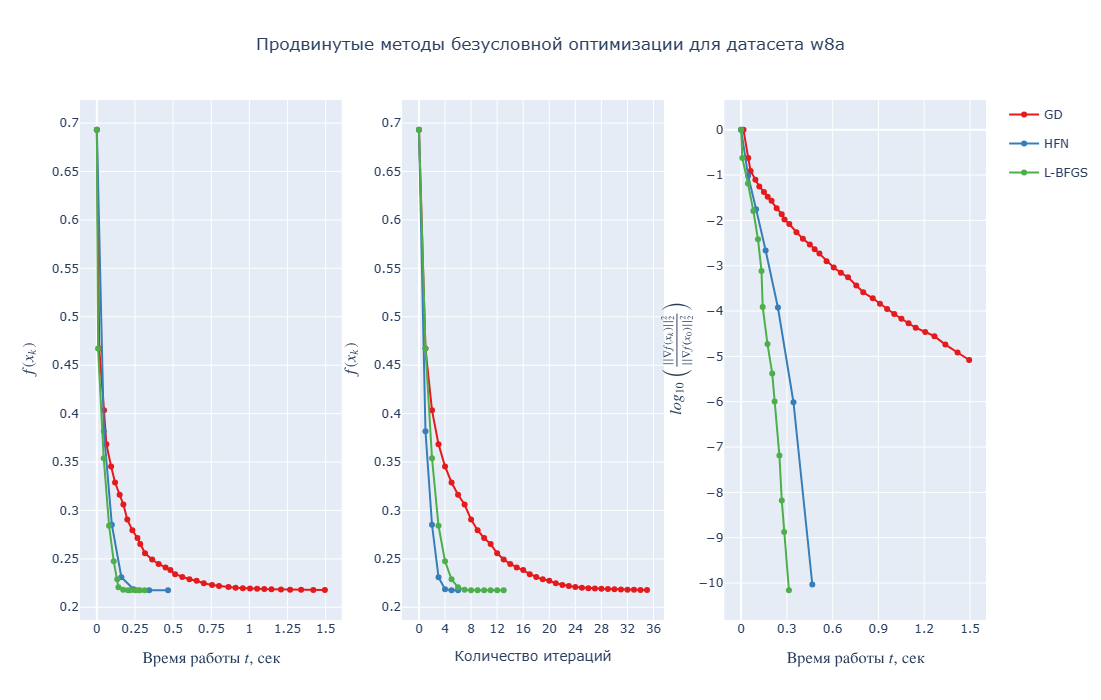

In [16]:
fig = make_subplots(rows=1, cols=3, )  # subplot_titles=('Subplot title1',  'Subplot title2')

fig.add_trace(go.Scatter(x=hist_w8a_grad['time'], y=hist_w8a_grad['func'], name='GD',
                         mode='lines+markers', line_color=colors[0], legendgroup='group'), row=1, col=1)
fig.add_trace(go.Scatter(x=hist_w8a_hfn['time'], y=hist_w8a_hfn['func'], name='HFN',
                         mode='lines+markers', line_color=colors[1], legendgroup='group2'), row=1, col=1)
fig.add_trace(go.Scatter(x=hist_w8a_lbfgs['time'], y=hist_w8a_lbfgs['func'], name='L-BFGS',
                         mode='lines+markers', line_color=colors[2], legendgroup='group3'), row=1, col=1)

fig.add_trace(go.Scatter(x=np.arange(len(hist_w8a_grad['func'])), y=hist_w8a_grad['func'], name='GD',
                         mode='lines+markers', line_color=colors[0], legendgroup='group', showlegend=False), row=1, col=2)
fig.add_trace(go.Scatter(x=np.arange(len(hist_w8a_hfn['func'])), y=hist_w8a_hfn['func'], name='HFN',
                         mode='lines+markers', line_color=colors[1], legendgroup='group2', showlegend=False), row=1, col=2)
fig.add_trace(go.Scatter(x=np.arange(len(hist_w8a_lbfgs['func'])), y=hist_w8a_lbfgs['func'], name='L-BFGS',
                         mode='lines+markers', line_color=colors[2], legendgroup='group3', showlegend=False), row=1, col=2)

fig.add_trace(go.Scatter(x=hist_w8a_grad['time'], y=log_grad_w8a_grad, name='GD',
                         mode='lines+markers', line_color=colors[0], legendgroup='group', showlegend=False), row=1, col=3)
fig.add_trace(go.Scatter(x=hist_w8a_hfn['time'], y=log_grad_w8a_hfn, name='Newton',
                         mode='lines+markers', line_color=colors[1], legendgroup='group2', showlegend=False), row=1, col=3)
fig.add_trace(go.Scatter(x=hist_w8a_lbfgs['time'], y=log_grad_w8a_lbfgs, name='Newton',
                         mode='lines+markers', line_color=colors[2], legendgroup='group3', showlegend=False), row=1, col=3)

fig.update_layout(title_text=r'Продвинутые методы безусловной оптимизации для датасета w8a', title_x=0.5,
                 width=1100,
                 height=700,)

fig['layout']['xaxis']['title']=r'$\text{Время работы } t \text{, сек}$'
fig['layout']['xaxis2']['title']=r'Количество итераций'
fig['layout']['xaxis3']['title']=r'$\text{Время работы } t \text{, сек}$'
fig['layout']['yaxis']['title']=r'$f(x_k)$'
fig['layout']['yaxis2']['title']=r'$f(x_k)$'
fig['layout']['yaxis3']['title']=r'$log_{10}\left(\frac{||\nabla f(x_k)||_2^2}{||\nabla f(x_0)||_2^2} \right)$'
fig['layout']['yaxis']['dtick']=0.05
fig['layout']['xaxis']['dtick']=0.25
fig['layout']['yaxis2']['dtick']=0.05
fig['layout']['xaxis2']['dtick']=4
fig['layout']['yaxis3']['dtick']=1
fig['layout']['xaxis3']['dtick']=0.3

fig.show()

# gesette

In [17]:
data_ges = load_svmlight_file('../Lab1/gisette_scale/gisette_scale')

In [18]:
data_ges[0].shape

(6000, 5000)

In [19]:
m_ges = data_ges[0].shape[1]

In [20]:
oracle_ges = create_log_reg_oracle(data_ges[0], data_ges[1], regcoef=1/m_ges)
x_0 = np.zeros(m_ges)

### GD

In [21]:
x_ges_grad, mes_ges_grad, hist_ges_grad = gradient_descent(oracle_ges, x_0, trace=True, tolerance=1e-4)

In [22]:
mes_ges_grad

'success'

In [23]:
log_grad_ges_grad = np.log10(np.array(hist_ges_grad['grad']) ** 2 / hist_ges_grad['grad'][0] ** 2)

### HFN

In [24]:
x_ges_hfn, mes_ges_hfn, hist_ges_hfn = optimization.hessian_free_newton(oracle_ges, x_0, trace=True, tolerance=1e-9)

In [25]:
mes_ges_hfn

'success'

In [26]:
log_grad_ges_hfn = np.log10(np.array(hist_ges_hfn['grad_norm']) ** 2 / hist_ges_hfn['grad_norm'][0] ** 2)

### L-BFGS

In [27]:
x_ges_lbfgs, mes_ges_lbfgs, hist_ges_lbfgs = optimization.lbfgs(oracle_ges, x_0, trace=True, tolerance=1e-9)

In [28]:
mes_ges_lbfgs

'success'

In [29]:
log_grad_ges_lbfgs = np.log10(np.array(hist_ges_lbfgs['grad_norm']) ** 2 / hist_ges_lbfgs['grad_norm'][0] ** 2)

In [30]:
colors = px.colors.qualitative.Set1[0:3]

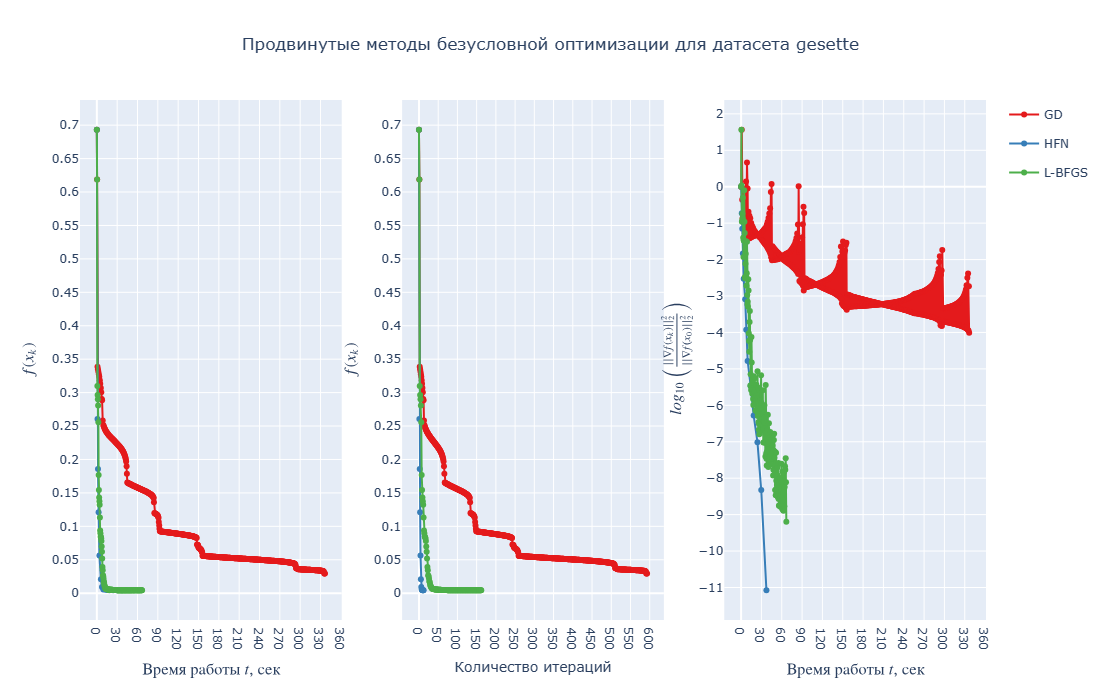

In [31]:
fig = make_subplots(rows=1, cols=3, )  # subplot_titles=('Subplot title1',  'Subplot title2')

fig.add_trace(go.Scatter(x=hist_ges_grad['time'], y=hist_ges_grad['func'], name='GD',
                         mode='lines+markers', line_color=colors[0], legendgroup='group'), row=1, col=1)
fig.add_trace(go.Scatter(x=hist_ges_hfn['time'], y=hist_ges_hfn['func'], name='HFN',
                         mode='lines+markers', line_color=colors[1], legendgroup='group2'), row=1, col=1)
fig.add_trace(go.Scatter(x=hist_ges_lbfgs['time'], y=hist_ges_lbfgs['func'], name='L-BFGS',
                         mode='lines+markers', line_color=colors[2], legendgroup='group3'), row=1, col=1)

fig.add_trace(go.Scatter(x=np.arange(len(hist_ges_grad['func'])), y=hist_ges_grad['func'], name='GD',
                         mode='lines+markers', line_color=colors[0], legendgroup='group', showlegend=False), row=1, col=2)
fig.add_trace(go.Scatter(x=np.arange(len(hist_ges_hfn['func'])), y=hist_ges_hfn['func'], name='HFN',
                         mode='lines+markers', line_color=colors[1], legendgroup='group2', showlegend=False), row=1, col=2)
fig.add_trace(go.Scatter(x=np.arange(len(hist_ges_lbfgs['func'])), y=hist_ges_lbfgs['func'], name='L-BFGS',
                         mode='lines+markers', line_color=colors[2], legendgroup='group3', showlegend=False), row=1, col=2)

fig.add_trace(go.Scatter(x=hist_ges_grad['time'], y=log_grad_ges_grad, name='GD',
                         mode='lines+markers', line_color=colors[0], legendgroup='group', showlegend=False), row=1, col=3)
fig.add_trace(go.Scatter(x=hist_ges_hfn['time'], y=log_grad_ges_hfn, name='Newton',
                         mode='lines+markers', line_color=colors[1], legendgroup='group2', showlegend=False), row=1, col=3)
fig.add_trace(go.Scatter(x=hist_ges_lbfgs['time'], y=log_grad_ges_lbfgs, name='Newton',
                         mode='lines+markers', line_color=colors[2], legendgroup='group3', showlegend=False), row=1, col=3)

fig.update_layout(title_text=r'Продвинутые методы безусловной оптимизации для датасета gesette', title_x=0.5,
                 width=1100,
                 height=700,)

fig['layout']['xaxis']['title']=r'$\text{Время работы } t \text{, сек}$'
fig['layout']['xaxis2']['title']=r'Количество итераций'
fig['layout']['xaxis3']['title']=r'$\text{Время работы } t \text{, сек}$'
fig['layout']['yaxis']['title']=r'$f(x_k)$'
fig['layout']['yaxis2']['title']=r'$f(x_k)$'
fig['layout']['yaxis3']['title']=r'$log_{10}\left(\frac{||\nabla f(x_k)||_2^2}{||\nabla f(x_0)||_2^2} \right)$'
fig['layout']['yaxis']['dtick']=0.05
fig['layout']['xaxis']['dtick']=30
fig['layout']['yaxis2']['dtick']=0.05
fig['layout']['xaxis2']['dtick']=50
fig['layout']['yaxis3']['dtick']=1
fig['layout']['xaxis3']['dtick']=30

fig.show()

# real-sim

In [32]:
data_real = load_svmlight_file('../Lab1/real-sim/real-sim')

In [33]:
data_real[0].shape

(72309, 20958)

In [34]:
m_real = data_real[0].shape[1]

In [35]:
oracle_real = create_log_reg_oracle(data_real[0], data_real[1], regcoef=1/m_real)
x_0 = np.zeros(m_real)

### GD

In [36]:
x_real_grad, mes_real_grad, hist_real_grad = gradient_descent(oracle_real, x_0, trace=True, tolerance=1e-4)

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning:

The line search algorithm did not converge

C:\Users\User\PycharmProjects\Optim_HSE\Lab2\..\Lab1\optimization.py:82: LineSearchWarning:

The line search algorithm did not converge



In [37]:
mes_real_grad

'success'

In [38]:
log_grad_real_grad = np.log10(np.array(hist_real_grad['grad']) ** 2 / hist_real_grad['grad'][0] ** 2)

### HFN

In [39]:
x_real_hfn, mes_real_hfn, hist_real_hfn = optimization.hessian_free_newton(oracle_real, x_0, trace=True, tolerance=1e-9)

In [40]:
mes_real_hfn

'success'

In [41]:
log_grad_real_hfn = np.log10(np.array(hist_real_hfn['grad_norm']) ** 2 / hist_real_hfn['grad_norm'][0] ** 2)

### L-BFGS

In [42]:
x_real_lbfgs, mes_real_lbfgs, hist_real_lbfgs = optimization.lbfgs(oracle_real, x_0, trace=True, tolerance=1e-9)

In [43]:
mes_real_lbfgs

'success'

In [44]:
log_grad_real_lbfgs = np.log10(np.array(hist_real_lbfgs['grad_norm']) ** 2 / hist_real_lbfgs['grad_norm'][0] ** 2)

In [45]:
colors = px.colors.qualitative.Set1[0:3]

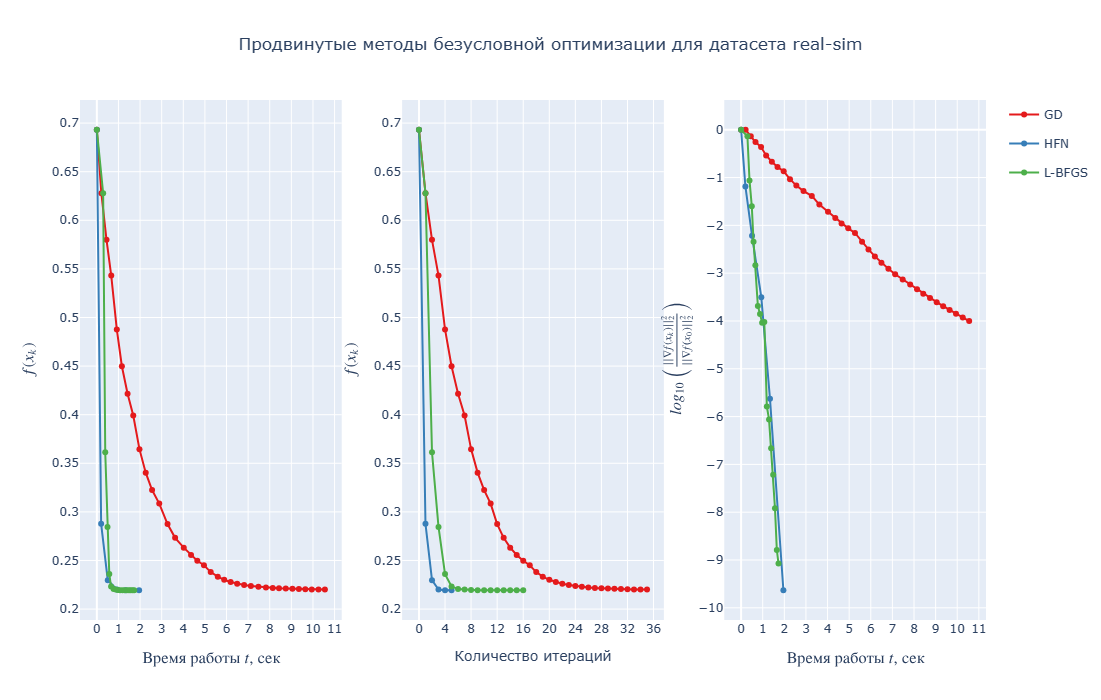

In [46]:
fig = make_subplots(rows=1, cols=3, )  # subplot_titles=('Subplot title1',  'Subplot title2')

fig.add_trace(go.Scatter(x=hist_real_grad['time'], y=hist_real_grad['func'], name='GD',
                         mode='lines+markers', line_color=colors[0], legendgroup='group'), row=1, col=1)
fig.add_trace(go.Scatter(x=hist_real_hfn['time'], y=hist_real_hfn['func'], name='HFN',
                         mode='lines+markers', line_color=colors[1], legendgroup='group2'), row=1, col=1)
fig.add_trace(go.Scatter(x=hist_real_lbfgs['time'], y=hist_real_lbfgs['func'], name='L-BFGS',
                         mode='lines+markers', line_color=colors[2], legendgroup='group3'), row=1, col=1)

fig.add_trace(go.Scatter(x=np.arange(len(hist_real_grad['func'])), y=hist_real_grad['func'], name='GD',
                         mode='lines+markers', line_color=colors[0], legendgroup='group', showlegend=False), row=1, col=2)
fig.add_trace(go.Scatter(x=np.arange(len(hist_real_hfn['func'])), y=hist_real_hfn['func'], name='HFN',
                         mode='lines+markers', line_color=colors[1], legendgroup='group2', showlegend=False), row=1, col=2)
fig.add_trace(go.Scatter(x=np.arange(len(hist_real_lbfgs['func'])), y=hist_real_lbfgs['func'], name='L-BFGS',
                         mode='lines+markers', line_color=colors[2], legendgroup='group3', showlegend=False), row=1, col=2)

fig.add_trace(go.Scatter(x=hist_real_grad['time'], y=log_grad_real_grad, name='GD',
                         mode='lines+markers', line_color=colors[0], legendgroup='group', showlegend=False), row=1, col=3)
fig.add_trace(go.Scatter(x=hist_real_hfn['time'], y=log_grad_real_hfn, name='Newton',
                         mode='lines+markers', line_color=colors[1], legendgroup='group2', showlegend=False), row=1, col=3)
fig.add_trace(go.Scatter(x=hist_real_lbfgs['time'], y=log_grad_real_lbfgs, name='Newton',
                         mode='lines+markers', line_color=colors[2], legendgroup='group3', showlegend=False), row=1, col=3)

fig.update_layout(title_text=r'Продвинутые методы безусловной оптимизации для датасета real-sim', title_x=0.5,
                 width=1100,
                 height=700,)

fig['layout']['xaxis']['title']=r'$\text{Время работы } t \text{, сек}$'
fig['layout']['xaxis2']['title']=r'Количество итераций'
fig['layout']['xaxis3']['title']=r'$\text{Время работы } t \text{, сек}$'
fig['layout']['yaxis']['title']=r'$f(x_k)$'
fig['layout']['yaxis2']['title']=r'$f(x_k)$'
fig['layout']['yaxis3']['title']=r'$log_{10}\left(\frac{||\nabla f(x_k)||_2^2}{||\nabla f(x_0)||_2^2} \right)$'
fig['layout']['yaxis']['dtick']=0.05
fig['layout']['xaxis']['dtick']=1
fig['layout']['yaxis2']['dtick']=0.05
fig['layout']['xaxis2']['dtick']=4
fig['layout']['yaxis3']['dtick']=1
fig['layout']['xaxis3']['dtick']=1

fig.show()

# news20.binary

In [47]:
data_news = load_svmlight_file('../Lab1/news20.binary')

In [48]:
data_news[0].shape

(19996, 1355191)

In [49]:
m_news = data_news[0].shape[1]

In [50]:
oracle_news = create_log_reg_oracle(data_news[0], data_news[1], regcoef=1/m_news)
x_0 = np.zeros(m_news)

### GD

In [51]:
x_news_grad, mes_news_grad, hist_news_grad = gradient_descent(oracle_news, x_0, trace=True, tolerance=1e-4)

In [52]:
mes_news_grad

'success'

In [53]:
log_grad_news_grad = np.log10(np.array(hist_news_grad['grad']) ** 2 / hist_news_grad['grad'][0] ** 2)

### HFN

In [54]:
x_news_hfn, mes_news_hfn, hist_news_hfn = optimization.hessian_free_newton(oracle_news, x_0, trace=True, tolerance=1e-9)

In [55]:
mes_news_hfn

'success'

In [56]:
log_grad_news_hfn = np.log10(np.array(hist_news_hfn['grad_norm']) ** 2 / hist_news_hfn['grad_norm'][0] ** 2)

### L-BFGS

In [57]:
x_news_lbfgs, mes_news_lbfgs, hist_news_lbfgs = optimization.lbfgs(oracle_news, x_0, trace=True, tolerance=1e-9)

In [58]:
mes_news_lbfgs

'success'

In [59]:
log_grad_news_lbfgs = np.log10(np.array(hist_news_lbfgs['grad_norm']) ** 2 / hist_news_lbfgs['grad_norm'][0] ** 2)

In [60]:
colors = px.colors.qualitative.Set1[0:3]

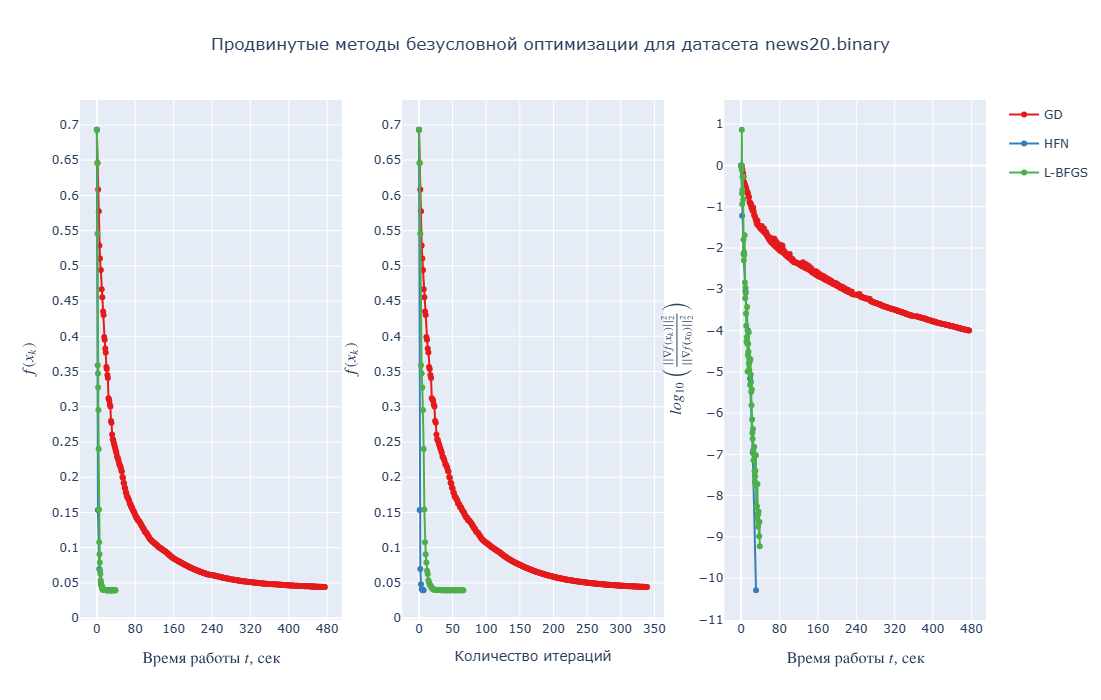

In [61]:
fig = make_subplots(rows=1, cols=3, )  # subplot_titles=('Subplot title1',  'Subplot title2')

fig.add_trace(go.Scatter(x=hist_news_grad['time'], y=hist_news_grad['func'], name='GD',
                         mode='lines+markers', line_color=colors[0], legendgroup='group'), row=1, col=1)
fig.add_trace(go.Scatter(x=hist_news_hfn['time'], y=hist_news_hfn['func'], name='HFN',
                         mode='lines+markers', line_color=colors[1], legendgroup='group2'), row=1, col=1)
fig.add_trace(go.Scatter(x=hist_news_lbfgs['time'], y=hist_news_lbfgs['func'], name='L-BFGS',
                         mode='lines+markers', line_color=colors[2], legendgroup='group3'), row=1, col=1)

fig.add_trace(go.Scatter(x=np.arange(len(hist_news_grad['func'])), y=hist_news_grad['func'], name='GD',
                         mode='lines+markers', line_color=colors[0], legendgroup='group', showlegend=False), row=1, col=2)
fig.add_trace(go.Scatter(x=np.arange(len(hist_news_hfn['func'])), y=hist_news_hfn['func'], name='HFN',
                         mode='lines+markers', line_color=colors[1], legendgroup='group2', showlegend=False), row=1, col=2)
fig.add_trace(go.Scatter(x=np.arange(len(hist_news_lbfgs['func'])), y=hist_news_lbfgs['func'], name='L-BFGS',
                         mode='lines+markers', line_color=colors[2], legendgroup='group3', showlegend=False), row=1, col=2)

fig.add_trace(go.Scatter(x=hist_news_grad['time'], y=log_grad_news_grad, name='GD',
                         mode='lines+markers', line_color=colors[0], legendgroup='group', showlegend=False), row=1, col=3)
fig.add_trace(go.Scatter(x=hist_news_hfn['time'], y=log_grad_news_hfn, name='Newton',
                         mode='lines+markers', line_color=colors[1], legendgroup='group2', showlegend=False), row=1, col=3)
fig.add_trace(go.Scatter(x=hist_news_lbfgs['time'], y=log_grad_news_lbfgs, name='Newton',
                         mode='lines+markers', line_color=colors[2], legendgroup='group3', showlegend=False), row=1, col=3)

fig.update_layout(title_text=r'Продвинутые методы безусловной оптимизации для датасета news20.binary', title_x=0.5,
                 width=1100,
                 height=700,)

fig['layout']['xaxis']['title']=r'$\text{Время работы } t \text{, сек}$'
fig['layout']['xaxis2']['title']=r'Количество итераций'
fig['layout']['xaxis3']['title']=r'$\text{Время работы } t \text{, сек}$'
fig['layout']['yaxis']['title']=r'$f(x_k)$'
fig['layout']['yaxis2']['title']=r'$f(x_k)$'
fig['layout']['yaxis3']['title']=r'$log_{10}\left(\frac{||\nabla f(x_k)||_2^2}{||\nabla f(x_0)||_2^2} \right)$'
fig['layout']['yaxis']['dtick']=0.05
fig['layout']['xaxis']['dtick']=80
fig['layout']['yaxis2']['dtick']=0.05
fig['layout']['xaxis2']['dtick']=50
fig['layout']['yaxis3']['dtick']=1
fig['layout']['xaxis3']['dtick']=80

fig.show()

#  rcv1.binary

In [62]:
data_rcv1 = load_svmlight_file('../Lab1/rcv1_train.binary')

In [63]:
data_rcv1[0].shape

(20242, 47236)

In [64]:
m_rcv1 = data_rcv1[0].shape[1]

In [65]:
oracle_rcv1 = create_log_reg_oracle(data_rcv1[0], data_rcv1[1], regcoef=1/m_rcv1)
x_0 = np.zeros(m_rcv1)

### GD

In [66]:
x_rcv1_grad, mes_rcv1_grad, hist_rcv1_grad = gradient_descent(oracle_rcv1, x_0, trace=True, tolerance=1e-4)

In [67]:
mes_rcv1_grad

'success'

In [68]:
log_grad_rcv1_grad = np.log10(np.array(hist_rcv1_grad['grad']) ** 2 / hist_rcv1_grad['grad'][0] ** 2)

### HFN

In [69]:
x_rcv1_hfn, mes_rcv1_hfn, hist_rcv1_hfn = optimization.hessian_free_newton(oracle_rcv1, x_0, trace=True, tolerance=1e-9)

In [70]:
mes_rcv1_hfn

'success'

In [71]:
log_grad_rcv1_hfn = np.log10(np.array(hist_rcv1_hfn['grad_norm']) ** 2 / hist_rcv1_hfn['grad_norm'][0] ** 2)

### L-BFGS

In [72]:
x_rcv1_lbfgs, mes_rcv1_lbfgs, hist_rcv1_lbfgs = optimization.lbfgs(oracle_rcv1, x_0, trace=True, tolerance=1e-9)

In [73]:
mes_rcv1_lbfgs

'success'

In [74]:
log_grad_rcv1_lbfgs = np.log10(np.array(hist_rcv1_lbfgs['grad_norm']) ** 2 / hist_rcv1_lbfgs['grad_norm'][0] ** 2)

In [75]:
colors = px.colors.qualitative.Set1[0:3]

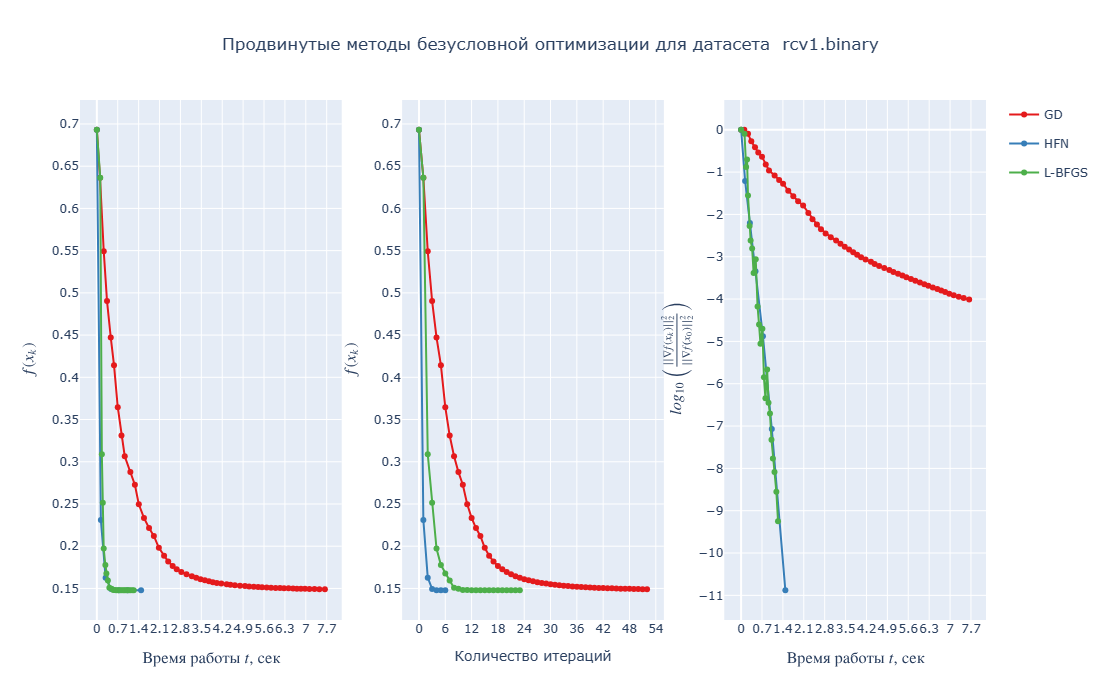

In [76]:
fig = make_subplots(rows=1, cols=3, )  # subplot_titles=('Subplot title1',  'Subplot title2')

fig.add_trace(go.Scatter(x=hist_rcv1_grad['time'], y=hist_rcv1_grad['func'], name='GD',
                         mode='lines+markers', line_color=colors[0], legendgroup='group'), row=1, col=1)
fig.add_trace(go.Scatter(x=hist_rcv1_hfn['time'], y=hist_rcv1_hfn['func'], name='HFN',
                         mode='lines+markers', line_color=colors[1], legendgroup='group2'), row=1, col=1)
fig.add_trace(go.Scatter(x=hist_rcv1_lbfgs['time'], y=hist_rcv1_lbfgs['func'], name='L-BFGS',
                         mode='lines+markers', line_color=colors[2], legendgroup='group3'), row=1, col=1)

fig.add_trace(go.Scatter(x=np.arange(len(hist_rcv1_grad['func'])), y=hist_rcv1_grad['func'], name='GD',
                         mode='lines+markers', line_color=colors[0], legendgroup='group', showlegend=False), row=1, col=2)
fig.add_trace(go.Scatter(x=np.arange(len(hist_rcv1_hfn['func'])), y=hist_rcv1_hfn['func'], name='HFN',
                         mode='lines+markers', line_color=colors[1], legendgroup='group2', showlegend=False), row=1, col=2)
fig.add_trace(go.Scatter(x=np.arange(len(hist_rcv1_lbfgs['func'])), y=hist_rcv1_lbfgs['func'], name='L-BFGS',
                         mode='lines+markers', line_color=colors[2], legendgroup='group3', showlegend=False), row=1, col=2)

fig.add_trace(go.Scatter(x=hist_rcv1_grad['time'], y=log_grad_rcv1_grad, name='GD',
                         mode='lines+markers', line_color=colors[0], legendgroup='group', showlegend=False), row=1, col=3)
fig.add_trace(go.Scatter(x=hist_rcv1_hfn['time'], y=log_grad_rcv1_hfn, name='Newton',
                         mode='lines+markers', line_color=colors[1], legendgroup='group2', showlegend=False), row=1, col=3)
fig.add_trace(go.Scatter(x=hist_rcv1_lbfgs['time'], y=log_grad_rcv1_lbfgs, name='Newton',
                         mode='lines+markers', line_color=colors[2], legendgroup='group3', showlegend=False), row=1, col=3)

fig.update_layout(title_text=r'Продвинутые методы безусловной оптимизации для датасета  rcv1.binary', title_x=0.5,
                 width=1100,
                 height=700,)

fig['layout']['xaxis']['title']=r'$\text{Время работы } t \text{, сек}$'
fig['layout']['xaxis2']['title']=r'Количество итераций'
fig['layout']['xaxis3']['title']=r'$\text{Время работы } t \text{, сек}$'
fig['layout']['yaxis']['title']=r'$f(x_k)$'
fig['layout']['yaxis2']['title']=r'$f(x_k)$'
fig['layout']['yaxis3']['title']=r'$log_{10}\left(\frac{||\nabla f(x_k)||_2^2}{||\nabla f(x_0)||_2^2} \right)$'
fig['layout']['yaxis']['dtick']=0.05
fig['layout']['xaxis']['dtick']=0.7
fig['layout']['yaxis2']['dtick']=0.05
fig['layout']['xaxis2']['dtick']=6
fig['layout']['yaxis3']['dtick']=1
fig['layout']['xaxis3']['dtick']=0.7

fig.show()